In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def reading_file(path):
    with open(path) as file:
        lines = file.readlines()
        header = lines[0].strip().split(',')
        data = []
        for line in lines[1:]:
            values = list(map(float, line.strip().split(',')[1:]))
            data.append(values)
        return data

#### Візуалізуємо дані з датасету для тренування

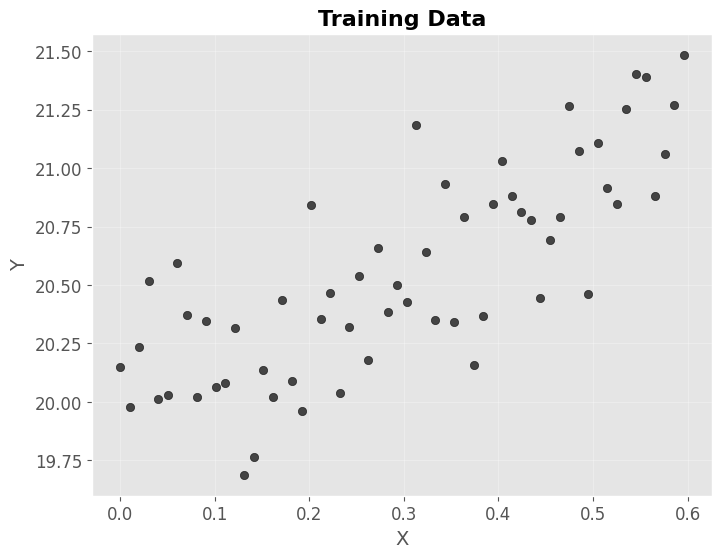

In [18]:
file_path = "lab_1_train.csv" 
training_data = reading_file(file_path)
x_training, y_training = zip(*training_data)

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x_training, y_training, c='black', alpha=0.7)
ax.set_title('Training Data', fontsize=16, fontweight='bold')
ax.set_xlabel('X', fontsize=14)
ax.set_ylabel('Y', fontsize=14)

ax.grid(True, alpha=0.3)
plt.tick_params(axis='both', which='major', labelsize=12)

# Показую дані
plt.show()

#### Обрахуємо регресію, функцію втрат та сам градієнтний спуск

In [36]:
def linear_regression_intercept_slope(intercept, slope, x):
    return intercept + slope * x


In [37]:
def calculate_mean_squared_error(predicted, actual):

    return np.mean((np.array(predicted) - np.array(actual)) ** 2)

In [38]:
def calculate_derivatives(y, predicted_y, x):
    diff_y = y - predicted_y
    derivative_intercept = - (2 / len(diff_y)) * np.sum(diff_y)
    derivative_slope = - (2 / len(diff_y)) * np.sum(np.multiply(diff_y, x))
    return derivative_intercept, derivative_slope

In [26]:
def train_linear_regression_model(training_data, tolerance=0.000001, learning_rate=0.01):
    intercept, slope = np.random.normal(), np.random.normal()
    
    # Витягую значення x і y із навчальних даних
    x = np.array(training_data)[:, 0].astype(float)
    y = np.array(training_data)[:, 1].astype(float)

    # Обчислюю початкові прогнозовані значення та втрати
    predicted_y = linear_regression_intercept_slope(intercept, slope, x)
    loss = calculate_mean_squared_error(predicted_y, y)

    # Ініціалізую дельти та номера епох
    delta = 100
    epoch_number = 0

    # Навчаю, доки не буде досягнуто критеріїв
    while tolerance < delta:
        
        derivative_intercept, derivative_slope = calculate_derivatives(y, predicted_y, x)

        # Оновлюю відрізок і нахил, використовуючи швидкість навчання та обчислені похідні
        intercept -= learning_rate * derivative_intercept
        slope -= learning_rate * derivative_slope

        # Обчислюю нові прогнозовані значення y і втрати
        predicted_y = linear_regression_intercept_slope(intercept, slope, x)
        current_loss = calculate_mean_squared_error(predicted_y, y)

        # Обчислюю зміну втрат щодо попередньої епохи
        delta, loss, epoch_number = loss - current_loss, current_loss, epoch_number + 1

        # Виводжу поточний номер епохи, втрати, значення перетину та нахилу
        print(f'Epoch {epoch_number}, Loss: {loss:.4f}, Intercept: {intercept:.4f}, Slope: {slope:.4f}')

    # Повертаю кінцеві значення перетину та нахилу
    return {"intercept": intercept, "slope": slope}

In [27]:
values = train_linear_regression_model(training_data)


Epoch 1, Loss: 412.5961, Intercept: 0.4939, Slope: -0.8358
Epoch 2, Loss: 394.7950, Intercept: 0.9000, Slope: -0.7130
Epoch 3, Loss: 377.7625, Intercept: 1.2972, Slope: -0.5930
Epoch 4, Loss: 361.4654, Intercept: 1.6858, Slope: -0.4757
Epoch 5, Loss: 345.8720, Intercept: 2.0659, Slope: -0.3609
Epoch 6, Loss: 330.9519, Intercept: 2.4378, Slope: -0.2487
Epoch 7, Loss: 316.6759, Intercept: 2.8015, Slope: -0.1389
Epoch 8, Loss: 303.0164, Intercept: 3.1573, Slope: -0.0316
Epoch 9, Loss: 289.9466, Intercept: 3.5053, Slope: 0.0733
Epoch 10, Loss: 277.4412, Intercept: 3.8457, Slope: 0.1760
Epoch 11, Loss: 265.4756, Intercept: 4.1788, Slope: 0.2763
Epoch 12, Loss: 254.0268, Intercept: 4.5045, Slope: 0.3744
Epoch 13, Loss: 243.0722, Intercept: 4.8232, Slope: 0.4703
Epoch 14, Loss: 232.5906, Intercept: 5.1349, Slope: 0.5642
Epoch 15, Loss: 222.5616, Intercept: 5.4399, Slope: 0.6559
Epoch 16, Loss: 212.9656, Intercept: 5.7382, Slope: 0.7456
Epoch 17, Loss: 203.7839, Intercept: 6.0299, Slope: 0.833

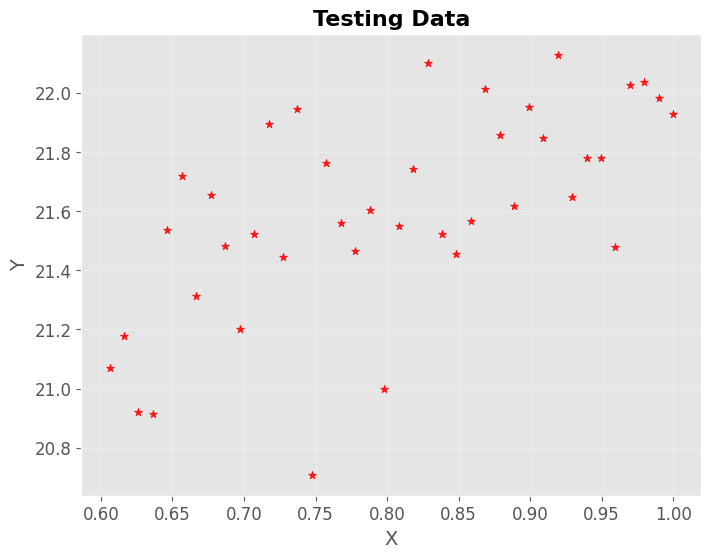

In [31]:
file_path = "lab_1_test.csv" 
testing_data = reading_file(file_path)
x_testing, y_testing = zip(*testing_data)

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x_testing, y_testing, c='red', alpha=0.9, marker='*')

ax.set_title('Testing Data', fontsize=16, fontweight='bold')
ax.set_xlabel('X', fontsize=14)
ax.set_ylabel('Y', fontsize=14)


ax.grid(True, alpha=0.3)
plt.tick_params(axis='both', which='major', labelsize=12)


plt.show()

#### Виведемо отримані результати

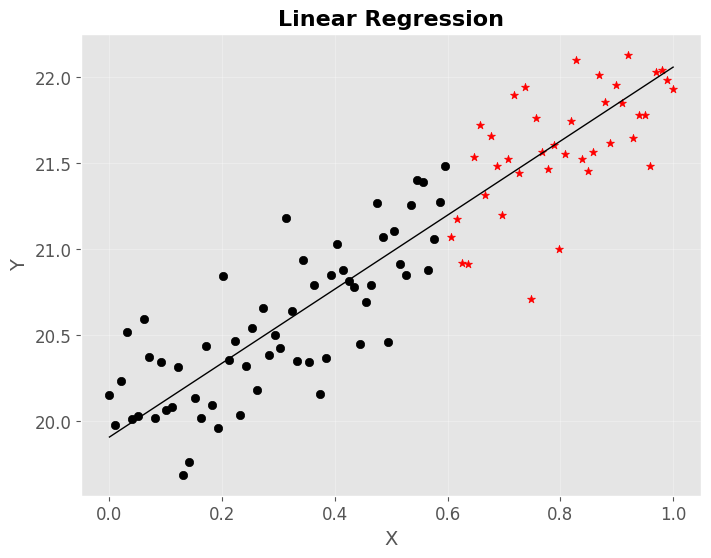

In [34]:

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(x_training, y_training, c='black', alpha=1, marker='o')

ax.scatter(x_testing, y_testing, c='red', alpha=1, marker='*')

ax.plot([0, 1], 
    [
        linear_regression_intercept_slope(values["intercept"], values["slope"], 0), # y коли x=0
        linear_regression_intercept_slope(values["intercept"], values["slope"], 1) # y коли x=1
    ], c='black', linestyle='-', linewidth=1)


ax.set_title('Linear Regression', fontsize=16, fontweight='bold')
ax.set_xlabel('X', fontsize=14)
ax.set_ylabel('Y', fontsize=14)

ax.grid(True, alpha=0.3)
plt.tick_params(axis='both', which='major', labelsize=12)

#Показую дані
plt.show()

#### Обчислимо втрати

In [35]:
# Прогнозую за даними тесту
predicted = []
for x in x_testing:
    y_pred = linear_regression_intercept_slope(values["intercept"], values["slope"], x)
    predicted.append(y_pred)

# Обчислюю втрати за даними тесту
loss = calculate_mean_squared_error(predicted, y_testing)
print("The loss on the test data:", loss)


The loss on the test data: 0.07538575704670045
